In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [38]:
df=pd.read_csv("/content/medical_cost_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [39]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [41]:
catgorical_col=[]
for i in df.dtypes.index:
  if df.dtypes[i] =="object":
    catgorical_col.append(i)

print('catgorical_col:',catgorical_col)
print('\n')



numerical_col=[]
for i in df.dtypes.index:
  if df.dtypes[i] != "object" :
    numerical_col.append(i)

print('numerical_col:',numerical_col)



catgorical_col: ['sex', 'smoker', 'region']


numerical_col: ['age', 'bmi', 'children', 'charges']


In [42]:
df.nunique().to_frame("no of unique value")

,no of unique value
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [43]:
df['charges'].value_counts()

1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64

In [44]:
df.shape

(1338, 7)

In [45]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


1.   count of all column is same so there is not any missing value
2.   mean and median(50%) is same for all coulmn so it normal distrubted graph
3. By summerizing we can observe there is huge diffrence between 75% and max so outlier is prsent



*   it shows that 50% raw is median()
*   it shows that min raw is mode()





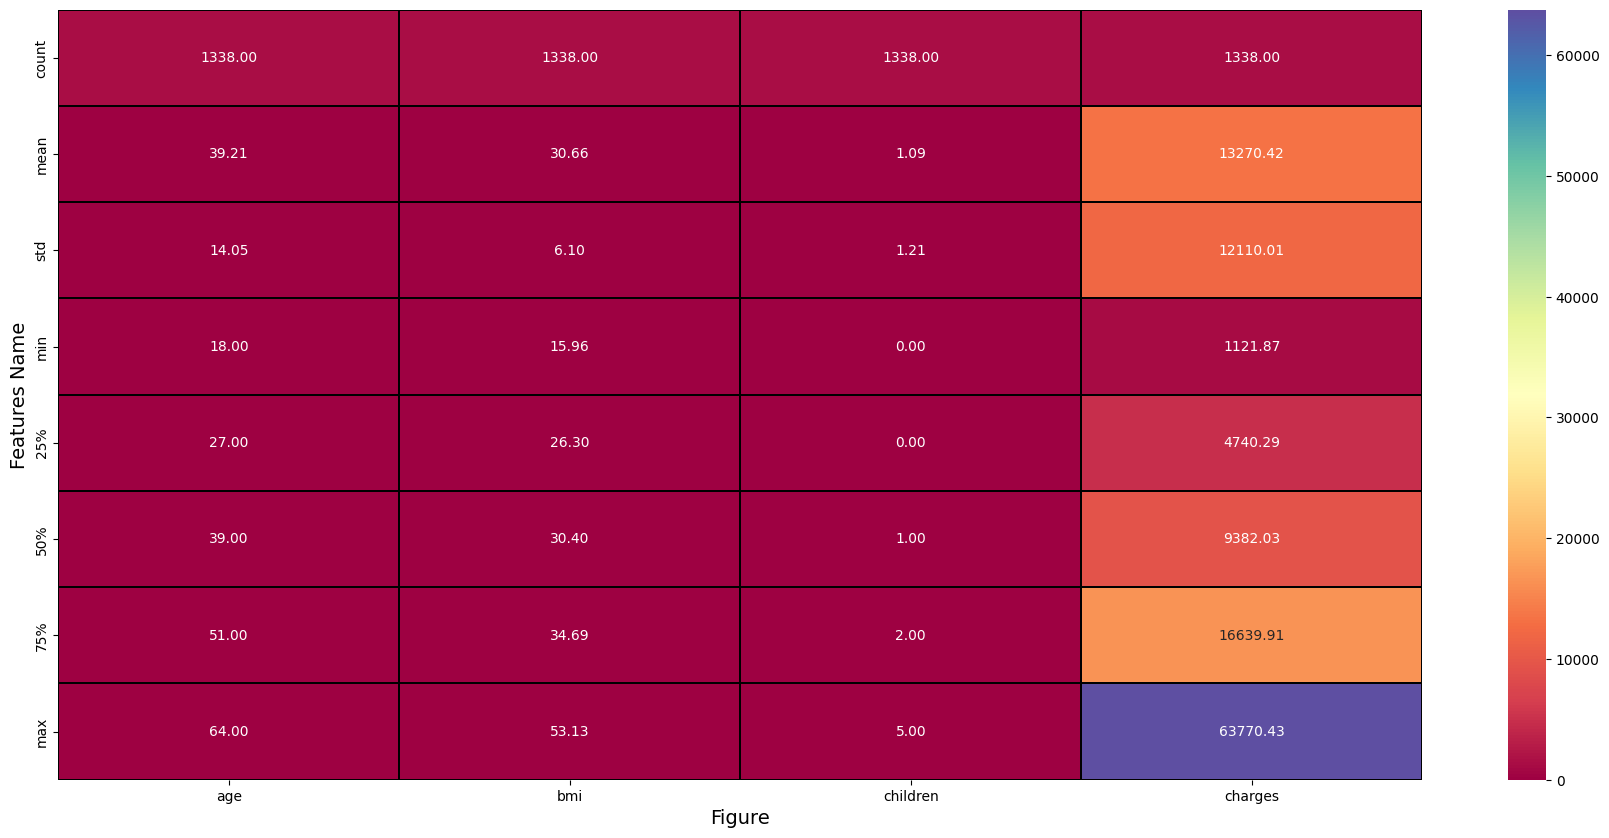

In [10]:
plt.figure(figsize=(22,10))
sns.heatmap(df.describe(),annot=True,fmt='0.2f', linewidth=0.2,linecolor= 'black',cmap='Spectral')
plt.xlabel('Figure',fontsize=14)
plt.ylabel('Features Name',fontsize=14)
plt.show()

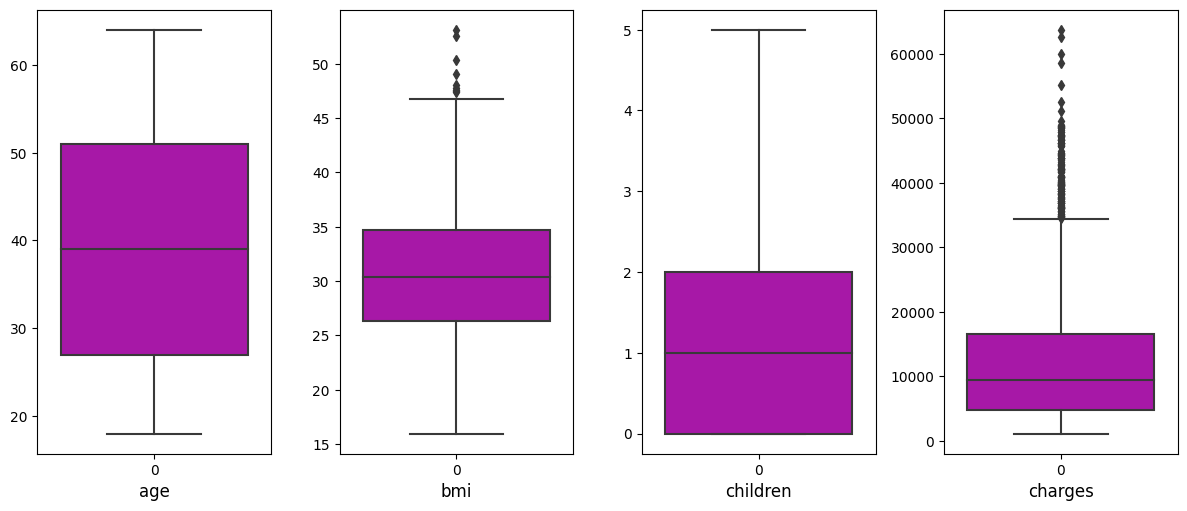

In [46]:
plt.figure(figsize=(15,25), facecolor="white")
plotnumber=1
for col in numerical_col:
  if plotnumber<=15:
    ax=plt.subplot(5,5,plotnumber)
    sns.boxplot(df[col],color="m")
    plt.xlabel(col, fontsize=12)
    plt.yticks(rotation=0, fontsize=10)
  plotnumber+=1

plt.tight_layout()

In [47]:
from scipy.stats import zscore
out_features= df[['age','bmi','children','charges']]
z=np.abs(zscore(out_features))
z

,age,bmi,children,charges
0,1.438764,0.453320,0.908614,0.298584
1,1.509965,0.509621,0.078767,0.953689
2,0.797954,0.383307,1.580926,0.728675
3,0.441948,1.305531,0.908614,0.719843
4,0.513149,0.292556,0.908614,0.776802
...,...,...,...,...
1333,0.768473,0.050297,1.580926,0.220551
1334,1.509965,0.206139,0.908614,0.914002
1335,1.509965,1.014878,0.908614,0.961596
1336,1.296362,0.797813,0.908614,0.930362


In [48]:
df1= df[(z<3).all(axis=1) ]
print(df1.shape)
print(df.shape)

(1309, 7)
(1338, 7)


In [49]:
#1st quantile
Q1= out_features.quantile(0.25)

#3rd quantile
Q3 = out_features.quantile(0.75)

#IQR
IQR= Q3 - Q1

df2=df[~((df<(Q1 - 1.5*IQR))| (df>(Q1+ 1.5*IQR))).any(axis=1)]
print(df2.shape)

#  | means or

(962, 7)


In [50]:
df=df1

In [51]:
numerical_col=[]
for i in df.dtypes.index:
  if df.dtypes[i] != "object" :
    numerical_col.append(i)

print('numerical_col:',numerical_col)

numerical_col: ['age', 'bmi', 'children', 'charges']


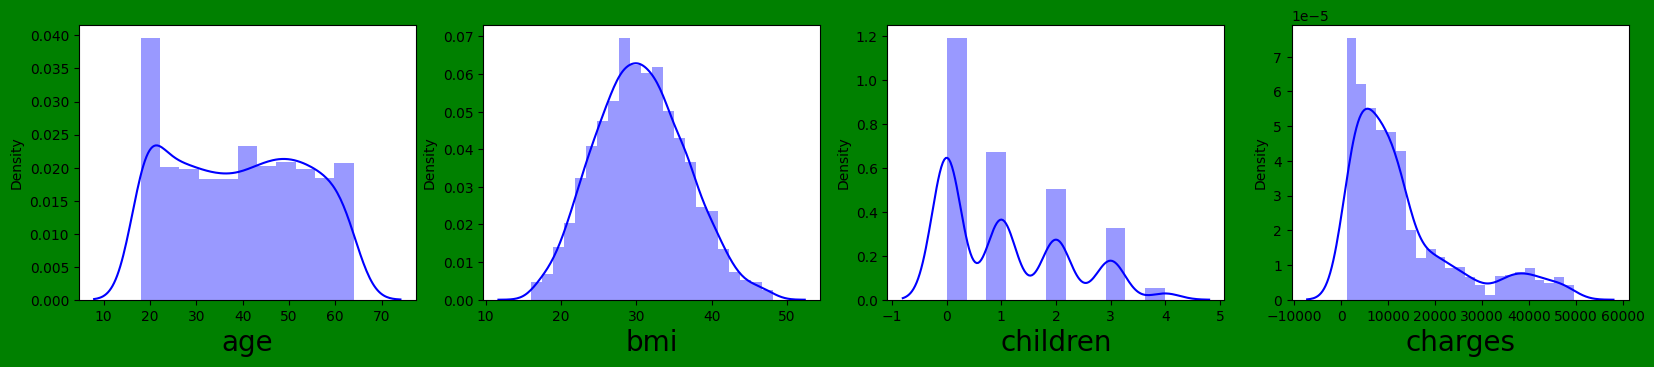

In [52]:
plt.figure(figsize=(20,25), facecolor='green')

plotnumber=1

for column in numerical_col:
  if plotnumber<=25:
    ax = plt.subplot(6,4,plotnumber)
    sns.distplot(df[column],color='b')
    plt.xlabel(column, fontsize=20)

  plotnumber+=1

plt.show()

In [23]:
df.skew()

age         0.051340
bmi         0.191432
children    0.738119
charges     1.437160
dtype: float64

In [24]:
df['charges']=np.cbrt(df['charges'])

In [26]:
df.skew()

age         0.051340
bmi         0.191432
children    0.738119
charges     0.481700
dtype: float64

In [55]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
  if df[i].dtype == 'object':
    df[i]=OE.fit_transform(df[i].values.reshape(-1,1))

df

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1336,21,0.0,25.800,0,0.0,3.0,2007.94500


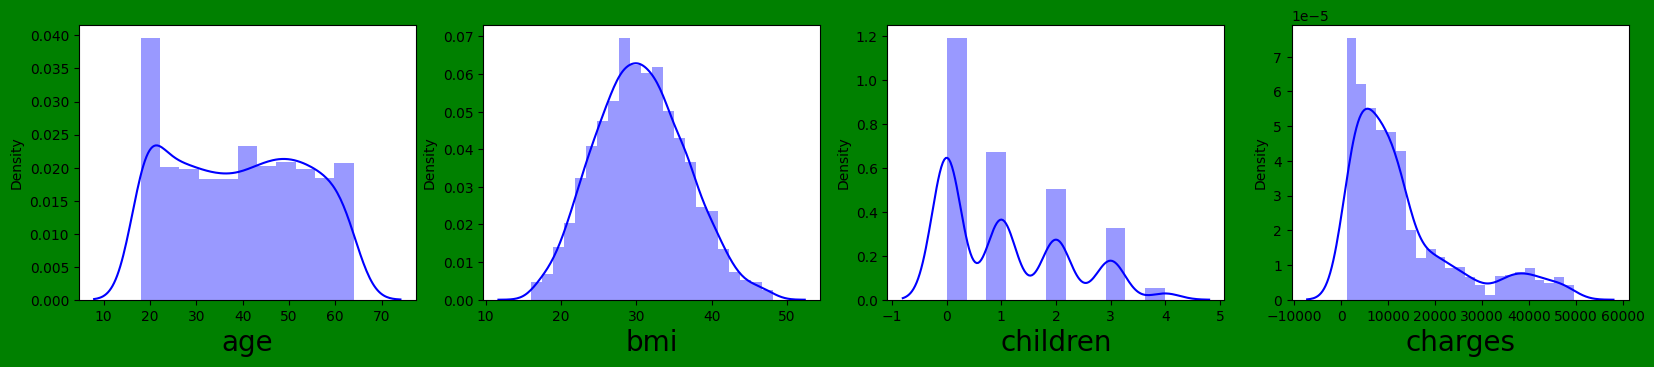

In [56]:
plt.figure(figsize=(20,25), facecolor='green')

plotnumber=1

for column in numerical_col:
  if plotnumber<=25:
    ax = plt.subplot(6,4,plotnumber)
    sns.distplot(df[column],color='b')
    plt.xlabel(column, fontsize=20)

  plotnumber+=1

plt.show()

In [57]:
df.skew()

age         0.051340
sex        -0.010708
bmi         0.191432
children    0.738119
smoker      1.482731
region     -0.023027
charges     1.437160
dtype: float64

In [58]:
df['charges']=np.cbrt(df['charges'])

In [59]:
df.skew()

age         0.051340
sex        -0.010708
bmi         0.191432
children    0.738119
smoker      1.482731
region     -0.023027
charges     0.481700
dtype: float64

In [60]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019253,0.118178,0.059100,-0.029090,0.003121,0.456015
sex,-0.019253,1.000000,0.042498,0.014056,0.079058,0.003084,0.029101
bmi,0.118178,0.042498,1.000000,0.029916,-0.005288,0.160126,0.153914
children,0.059100,0.014056,0.029916,1.000000,0.028844,-0.002976,0.151181
smoker,-0.029090,0.079058,-0.005288,0.028844,1.000000,-0.003474,0.725957
region,0.003121,0.003084,0.160126,-0.002976,-0.003474,1.000000,-0.031659
charges,0.456015,0.029101,0.153914,0.151181,0.725957,-0.031659,1.000000


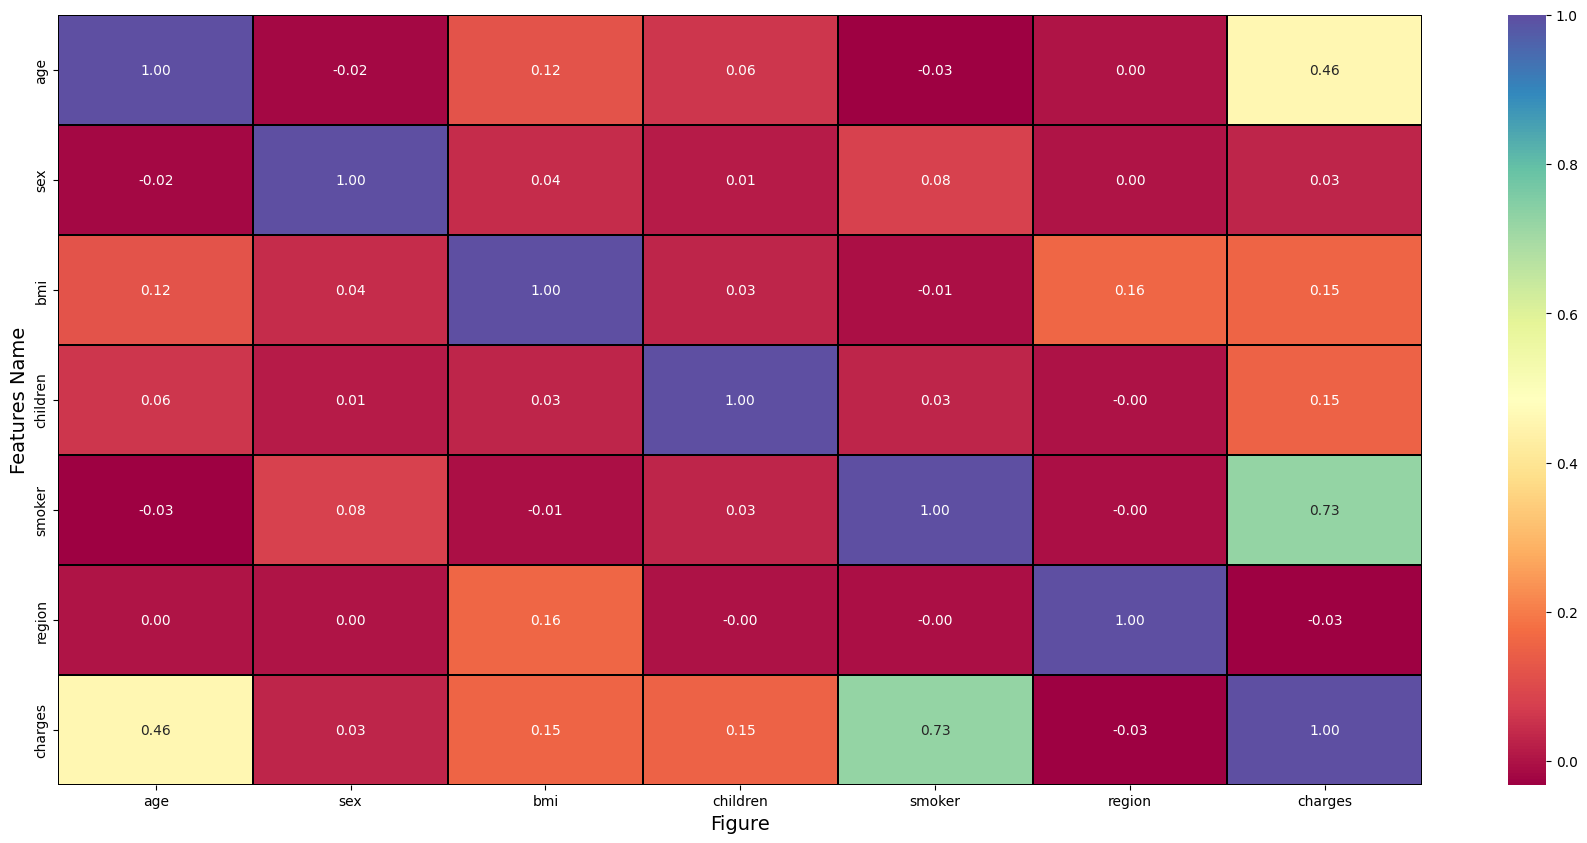

In [61]:
plt.figure(figsize=(22,10))
sns.heatmap(df.corr(),annot=True,fmt='0.2f', linewidth=0.2,linecolor= 'black',cmap='Spectral')
plt.xlabel('Figure',fontsize=14)
plt.ylabel('Features Name',fontsize=14)
plt.show()





In [62]:
x = df1.drop('charges', axis=1)
y = df1['charges']

print("Feature " , x.shape)
print("lable",y.shape)

Feature  (1309, 6)
lable (1309,)


In [63]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns = x.columns)
x

,age,sex,bmi,children,smoker,region
0,-1.439063,-1.005362,-0.449359,-0.929616,1.984848,1.352753
1,-1.510086,0.994667,0.533391,-0.040093,-0.503817,0.447460
2,-0.799859,0.994667,0.404478,1.738954,-0.503817,0.447460
3,-0.444746,0.994667,-1.319101,-0.929616,-0.503817,-0.457833
4,-0.515769,0.994667,-0.285288,-0.929616,-0.503817,-0.457833
...,...,...,...,...,...,...
1304,0.762639,0.994667,0.064617,1.738954,-0.503817,-0.457833
1305,-1.510086,-1.005362,0.223666,-0.929616,-0.503817,-1.363127
1306,-1.510086,-1.005362,1.049041,-0.929616,-0.503817,0.447460
1307,-1.297018,-1.005362,-0.800939,-0.929616,-0.503817,1.352753


In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,1.019082,age
1,1.008815,sex
2,1.043841,bmi
3,1.005176,children
4,1.007983,smoker
5,1.026656,region


In [65]:
#importing necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [66]:
maxAccu=0
maxRs=0
for i in range(1,200):
  x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.30, random_state=i)
  lr=LinearRegression()
  lr.fit(x_train,y_train)
  pred = lr.predict(x_test)
  acc=r2_score(y_test,pred)
  if acc>maxAccu:
    maxAccu=acc
    maxRs=i

print ("max r2 score is ", maxAccu,"on_Random_state",maxRs)


max r2 score is  0.8422414663038843 on_Random_state 27


In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge


In [68]:
LR = LinearRegression()
LR.fit(x_train,y_train)
pred_LR= LR.predict(x_test)
pred_train= LR.predict(x_train)
print('R2_score', r2_score(y_test,pred_LR))
print('R2_score on traing data',r2_score(y_train,pred_train)*100)
print('mean_absolute_error',mean_absolute_error(y_test,pred_LR))
print('mean_squared_error',mean_squared_error(y_test,pred_LR))
print('root mean square error',np.sqrt(mean_squared_error(y_test,pred_LR)))



R2_score 0.7561443356939136
R2_score on traing data 78.57250356344731
mean_absolute_error 2.0264963494825556
mean_squared_error 10.0578915378012
root mean square error 3.171417906520867


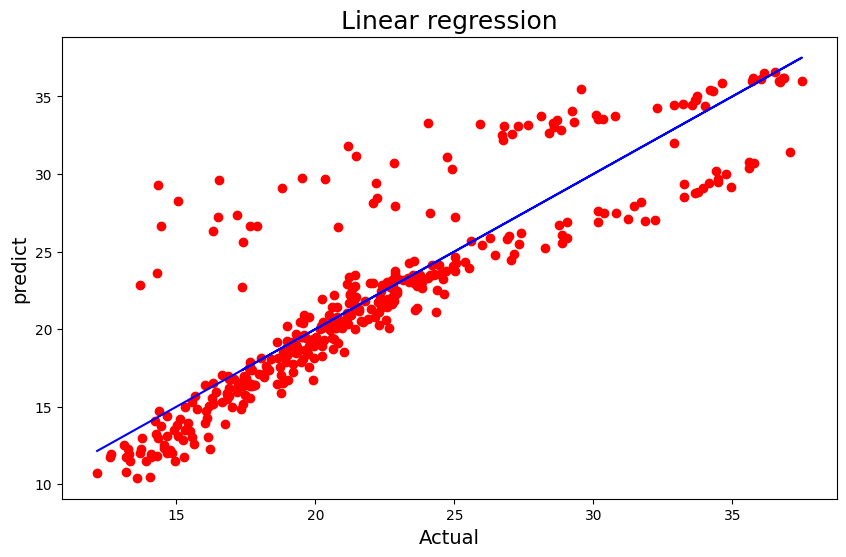

In [69]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_LR,y=y_test,color='r')
plt.plot(pred_LR,pred_LR, color='b')
plt.xlabel('Actual', fontsize=14)
plt.ylabel('predict',fontsize=14)
plt.title('Linear regression',fontsize=18)
plt.show()

In [70]:
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR= RFR.predict(x_test)
pred_train= RFR.predict(x_train)
print('R2_score', r2_score(y_test,pred_RFR))
print('R2_score on traing data',r2_score(y_train,pred_train)*100)
print('mean_absolute_error',mean_absolute_error(y_test,pred_RFR))
print('mean_squared_error',mean_squared_error(y_test,pred_RFR))
print('root mean square error',np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2_score 0.8007818754059365
R2_score on traing data 96.96788659863138
mean_absolute_error 1.5532956280296175
mean_squared_error 8.216804375789298
root mean square error 2.8664968822221484


In [71]:
knn = KNN()
knn.fit(x_train,y_train)
pred_knn= knn.predict(x_test)
pred_train= knn.predict(x_train)
print('R2_score', r2_score(y_test,pred_knn))
print('R2_score on traing data',r2_score(y_train,pred_train)*100)
print('mean_absolute_error',mean_absolute_error(y_test,pred_knn))
print('mean_squared_error',mean_squared_error(y_test,pred_knn))
print('root mean square error',np.sqrt(mean_squared_error(y_test,pred_knn)))

R2_score 0.7882717571239878
R2_score on traing data 86.04639803816083
mean_absolute_error 1.824829020005501
mean_squared_error 8.732787521651224
root mean square error 2.955129019459425


In [72]:
lasso = Lasso()
lasso.fit(x_train,y_train)
pred_lasso= lasso.predict(x_test)
pred_train= lasso.predict(x_train)
print('R2_score', r2_score(y_test,pred_lasso))
print('R2_score on traing data',r2_score(y_train,pred_train)*100)
print('mean_absolute_error',mean_absolute_error(y_test,pred_lasso))
print('mean_squared_error',mean_squared_error(y_test,pred_lasso))
print('root mean square error',np.sqrt(mean_squared_error(y_test,pred_lasso)))

R2_score 0.7099538980770943
R2_score on traing data 71.1077902404006
mean_absolute_error 2.450027512981684
mean_squared_error 11.963028385680214
root mean square error 3.458761105609957


In [73]:
rd=Ridge()
rd.fit(x_train,y_train)
pred_rd= rd.predict(x_test)
pred_train= rd.predict(x_train)
print('R2_score', r2_score(y_test,pred_rd))
print('R2_score on traing data',r2_score(y_train,pred_train)*100)
print('mean_absolute_error',mean_absolute_error(y_test,pred_rd))
print('mean_squared_error',mean_squared_error(y_test,pred_rd))
print('root mean square error',np.sqrt(mean_squared_error(y_test,pred_rd)))

R2_score 0.7562341978674499
R2_score on traing data 78.57240704412935
mean_absolute_error 2.0275525949906488
mean_squared_error 10.054185148624835
root mean square error 3.1708335100766227


In [74]:
from sklearn.tree import DecisionTreeRegressor
dtr =DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr= dtr.predict(x_test)
pred_train= dtr.predict(x_train)
print('R2_score', r2_score(y_test,pred_dtr))
print('R2_score on traing data',r2_score(y_train,pred_train)*100)
print('mean_absolute_error',mean_absolute_error(y_test,pred_dtr))
print('mean_squared_error',mean_squared_error(y_test,pred_dtr))
print('root mean square error',np.sqrt(mean_squared_error(y_test,pred_dtr)))


R2_score 0.6921074628355326
R2_score on traing data 99.5319788536171
mean_absolute_error 1.6139571815736344
mean_squared_error 12.6991093395789
root mean square error 3.5635809713796176


In [75]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_svr= svr.predict(x_test)
pred_train= svr.predict(x_train)
print('R2_score', r2_score(y_test,pred_svr))
print('R2_score on traing data',r2_score(y_train,pred_train)*100)
print('mean_absolute_error',mean_absolute_error(y_test,pred_svr))
print('mean_squared_error',mean_squared_error(y_test,pred_svr))
print('root mean square error',np.sqrt(mean_squared_error(y_test,pred_svr)))

R2_score 0.8044312994320789
R2_score on traing data 82.18260871745103
mean_absolute_error 1.2133609021537595
mean_squared_error 8.06628291410894
root mean square error 2.840120228812319


In [76]:
from sklearn.model_selection import cross_val_score

In [77]:
score=cross_val_score(LR,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("diffreance between R2 score  and cross validation score is -",(r2_score(y_test,pred_LR) - score.mean())*100)

[0.80716724 0.71318366 0.8258212  0.76931071 0.75932272]
0.7749611071779401
diffreance between R2 score  and cross validation score is - -1.8816771484026495


In [78]:
score1 =cross_val_score(RFR,x,y)
print(score1)
print(score1.mean())
print("diffreance between R2 score  and cross validation score is - ",(r2_score(y_test,pred_RFR) - score1.mean())*100)

[0.83942297 0.72452185 0.83236363 0.81296317 0.79903725]
0.8016617728830109
diffreance between R2 score  and cross validation score is -  -0.08798974770743984


In [79]:
score2 =cross_val_score(knn,x,y)
print(score2)
print(score2.mean())
print("diffreance between R2 score  and cross validation score is - ",(r2_score(y_test,pred_knn) - score2.mean())*100)

[0.83831363 0.72352425 0.82254285 0.7985657  0.79759698]
0.7961086819873306
diffreance between R2 score  and cross validation score is -  -0.7836924863342865


In [80]:
score3 =cross_val_score(lasso,x,y)
print(score3)
print(score3.mean())
print("diffreance between R2 score  and cross validation score is - ",(r2_score(y_test,pred_lasso) - score3.mean())*100)

[0.732016   0.66577455 0.72195579 0.7037805  0.69752432]
0.7042102310483853
diffreance between R2 score  and cross validation score is -  0.5743667028708987


In [81]:
score4 =cross_val_score(rd,x,y)
print(score4)
print(score4.mean())
print("diffreance between R2 score  and cross validation score is - ",(r2_score(y_test,pred_rd) - score4.mean())*100)

[0.80712361 0.7132917  0.82569941 0.7693657  0.75933709]
0.7749635006473351
diffreance between R2 score  and cross validation score is -  -1.872930277988516


In [82]:
score5 =cross_val_score(dtr,x,y)
print(score5)
print(score5.mean())
print("diffreance between R2 score  and cross validation score is - ",(r2_score(y_test,pred_dtr) - score5.mean())*100)

[0.71169937 0.58922696 0.63925454 0.71044065 0.56407659]
0.6429396246355942
diffreance between R2 score  and cross validation score is -  4.916783819993842


In [83]:
score6 =cross_val_score(svr,x,y)
print(score6)
print(score6.mean())
print("diffreance between R2 score  and cross validation score is - ",(r2_score(y_test,pred_svr) - score6.mean())*100)

[0.86549516 0.72858351 0.87178086 0.80057462 0.79398253]
0.8120833343455416
diffreance between R2 score  and cross validation score is -  -0.7652034913462669


In [84]:
from sklearn.model_selection import GridSearchCV


In [85]:
param={'alpha':[1.0,0.05,.4,2],'fit_intercept':[True,False],
       'solver':['auto','svd','cholsky','lsqr','sag','saga','lbfgs'],
       'positive':[False,True],
       'random_state':[1,4,10,20]

}

gscv= GridSearchCV(Ridge(),param,cv=5)
gscv.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.05, 0.4, 2],
                         'fit_intercept': [True, False],
                         'positive': [False, True],
                         'random_state': [1, 4, 10, 20],
                         'solver': ['auto', 'svd', 'cholsky', 'lsqr', 'sag',
                                    'saga', 'lbfgs']})

In [86]:
gscv.best_params_

{'alpha': 0.4,
 'fit_intercept': True,
 'positive': False,
 'random_state': 20,
 'solver': 'sag'}

In [87]:
Model=Ridge(alpha=0.05,fit_intercept = True, positive= False, random_state=1, solver='lsqr')

In [88]:
Model.fit(x_train,y_train)
pred= Model.predict(x_test)

print('R2_score', r2_score(y_test,pred_knn))
print('R2_score on traing data',r2_score(y_train,pred_train)*100)
print('mean_absolute_error',mean_absolute_error(y_test,pred))
print('mean_squared_error',mean_squared_error(y_test,pred))
print('root mean square error',np.sqrt(mean_squared_error(y_test,pred)))

R2_score 0.7882717571239878
R2_score on traing data 82.18260871745103
mean_absolute_error 2.0266531066126765
mean_squared_error 10.05805378329717
root mean square error 3.1714434857485907


In [89]:
import joblib

In [91]:
import pickle
filename='MedicalCostInsurance.pkl'
pickle.dump(Model, open(filename, 'wb')) #saved model

In [92]:
loaded_model= pickle.load(open('MedicalCostInsurance.pkl','rb'))
result=loaded_model.score(x_test,y_test)

print(result*100)

75.6140402018247


In [93]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['Predicted','Original'])

conclusion

,0,1,2,3,4,5,6,7,8,9,...,383,384,385,386,387,388,389,390,391,392
Predicted,17.367109,17.837587,14.330028,19.299083,34.189710,20.772646,29.033553,32.883039,16.306366,17.329698,...,21.878674,22.903421,20.214446,20.619894,20.482628,19.195279,19.537702,24.060243,23.356013,12.144636
Original,16.584129,16.428421,29.272021,18.980005,35.410249,20.233660,25.893930,32.006333,26.312868,16.332925,...,20.664343,23.287608,19.117186,18.711953,20.878970,18.999519,20.363740,33.295361,24.246651,10.751497
